# **Projeto de visualização de dados com Plotly**
**Grupo:**
- Amanda Moraes (ascm)
- Tales Alves (tta)

**Informações importantes:**

- As perguntas/tarefas levantadas no processo de desenvolvimento constam na seção `Análise Exploratória dos Dados/Investigação`.

- A célula com a implementação do dashboard que deve ser executada para sua visualização localmente está na seção `Dashboard`.
  - Para conseguir executar a célula do dashboard, execute todas as células seguintes sequencialmente.

- As curiosidades, conclusões e prints obtidos a partir das tarefas e das visualizações estão na seção `Conclusões e Curiosidades`.


## 🚧 Dependências

In [ ]:
! pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 7.0 MB/s 
     |████████████████████████████████| 357 kB 48.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=6e730ae135123d252b3cc335a948c497e2a4375d43ffc9e91629cd3477678708
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import plotly.express as px
import plotly.data as data
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn import preprocessing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  """


## 🎲 Análise Exploratória dos Dados

### 📂 Dataset

In [ ]:
dataset = data.tips()

In [ ]:
dataset.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


#### Há valores nulos no dataset?

In [ ]:
dataset.isnull().values.any()

False

### 🔍 Investigação
As perguntas feitas nesta seção foram levantadas durante o processo de exploração dos dados. As marcadas com o símbolo ✅ representam as questões eleitas para guiar o processo de montagem do dashboard.

#### Qual é a tendência de consumo por atributo `sex`?

Consumo e gorjetas médios por atributo `sex`

In [ ]:
average_tips = dataset.groupby(['sex'], as_index=False)['total_bill', 'tip'].mean()
average_tips

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,sex,total_bill,tip
0,Female,18.056897,2.833448
1,Male,20.744076,3.089618


#### Qual é a relação entre o valor da conta e das gorjetas? ✅

In [ ]:
# Qual é o valor médio de gorjeta e conta por pessoa para cada registro do dataset
dataset['mean_tip'] = [dataset.loc[index]['tip'] / dataset.loc[index]['size'] for index in dataset.index]
dataset['mean_bill'] = [dataset.loc[index]['total_bill'] / dataset.loc[index]['size'] for index in dataset.index]
dataset

,total_bill,tip,sex,smoker,day,time,size,mean_tip,mean_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,6.147500
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000,8.910000


#### Qual perfil/configuração de consumidores é mais comum? ✅

Configurações únicas e suas frequências dos consumidores no restaurante de acordo com os atributos [`sex`, `smoker`, `size`]

In [ ]:
config_consumers = dataset.drop(columns=['day','time','total_bill', 'tip', 'mean_tip', 'mean_bill']).value_counts()
config_consumers = config_consumers.rename_axis(['sex','smoker', 'size']).reset_index(name='frequency')
config_consumers

,sex,smoker,size,frequency
0,Male,No,2,57
1,Male,Yes,2,41
2,Female,No,2,33
3,Female,Yes,2,25
4,Male,No,4,19
5,Male,No,3,17
6,Female,No,3,9
7,Male,Yes,4,9
8,Female,No,4,7
9,Male,Yes,3,7


In [ ]:
print(f"Total de registros: {len(dataset)}")
print(f"Total de configurações distintas de reunião no restaurante: {len(config_consumers)}")

Total de registros: 244
Total de configurações distintas de reunião no restaurante: 20


In [ ]:
# Qual é o valor de gorjeta médio pago por pessoa em cada configuração
config_consumers['mean_tip'] = [dataset.loc[(dataset['sex'] == config_consumers.loc[index]['sex']) & (dataset['smoker'] == config_consumers.loc[index]['smoker']) \
            & (dataset['size'] == config_consumers.loc[index]['size'])]['tip'].sum() \
            / dataset.loc[(dataset['sex'] == config_consumers.loc[index]['sex']) & (dataset['smoker'] == config_consumers.loc[index]['smoker']) \
            & (dataset['size'] == config_consumers.loc[index]['size'])]['size'].sum()
            for index in config_consumers.index]
config_consumers

,sex,smoker,size,frequency,mean_tip
0,Male,No,2,57,1.278772
1,Male,Yes,2,41,1.346463
2,Female,No,2,33,1.185303
3,Female,Yes,2,25,1.368400
4,Male,No,4,19,1.065658
5,Male,No,3,17,1.049608
6,Female,No,3,9,0.972963
7,Male,Yes,4,9,0.995278
8,Female,No,4,7,1.003571
9,Male,Yes,3,7,1.424286


In [ ]:
# Qual é o valor de conta médio pago por pessoa em cada configuração
config_consumers['mean_bill'] = [dataset.loc[(dataset['sex'] == config_consumers.loc[index]['sex']) & (dataset['smoker'] == config_consumers.loc[index]['smoker']) \
            & (dataset['size'] == config_consumers.loc[index]['size'])]['total_bill'].sum() \
            / dataset.loc[(dataset['sex'] == config_consumers.loc[index]['sex']) & (dataset['smoker'] == config_consumers.loc[index]['smoker']) \
            & (dataset['size'] == config_consumers.loc[index]['size'])]['size'].sum()
            for index in config_consumers.index]
config_consumers

,sex,smoker,size,frequency,mean_tip,mean_bill
0,Male,No,2,57,1.278772,7.720000
1,Male,Yes,2,41,1.346463,9.708780
2,Female,No,2,33,1.185303,7.586818
3,Female,Yes,2,25,1.368400,7.779200
4,Male,No,4,19,1.065658,6.878158
5,Male,No,3,17,1.049608,7.305490
6,Female,No,3,9,0.972963,6.432222
7,Male,Yes,4,9,0.995278,7.318056
8,Female,No,4,7,1.003571,7.116429
9,Male,Yes,3,7,1.424286,10.014762


#### Quais são os dias da semana mais e menos movimentados?

In [ ]:
days = dataset['day'].unique()
days

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
freq_att_per_day = dataset['day'].value_counts()
freq_att_per_day = [freq_att_per_day[d] for d in ['Thur','Fri','Sat','Sun']]
freq_att_per_day = pd.DataFrame({'day': ['Thur','Fri','Sat','Sun'], 'freq': freq_att_per_day})
freq_att_per_day

,day,freq
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


#### Em que circunstâncias o restaurante arrecada mais? em quais arrecada menos? ✅

In [ ]:
dataset.groupby(['day','time'])['time'].count()

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Dinner     1
      Lunch     61
Name: time, dtype: int64

## 📊 Dashboard

In [ ]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1('Waiter Tips Dataset Analysis'),
    # Frequency of attendance unique configurations and tip-bill correlation
    html.Div([
      html.H2('Select an attribute to analyse it on the below visualizations:'),
      dcc.Dropdown(
          id="config-consumers-dropdown",
          options=[{'label':'Bill payer sex','value':'sex'}, {'label':'Table size','value':'size'}, \
                   {'label':'Presence of smokers at table','value':'smoker'},],
          value="sex",
          clearable=False,
      ),
      html.Div([
        # profile
        html.Div([
          # title
          html.H2('Analysis of different configurations and consumer profiles'),
          # graph freq
          html.Div([
              dcc.Graph(
                id='freq-config-consumers'
              ),
            ],
            style={'width': '100%'},
          ),
          # graphs bill tip
          html.Div([
            dcc.Graph(id='config_consumers_mean_bill'),
            dcc.Graph(id='config_consumers_mean_tip'),
          ], style={'width': '100%'},)
        ], style={'width': '50%'},),
        # tip-bill
        html.Div([
            # title
            html.H2('Analysis of the relationship between bill and tip'),
            # graphs
            dcc.Graph(
              id='bill-tip-scatter'
            ),
            dcc.Graph(
              id='config_consumers_mean_rev'
            )
          ],
          style={'width': '50%'}
        ),
      ], style={'width': '100%', 'display':'flex', 'flex-direction':'row', 'align-items': 'top'})
    ]),
    html.Div([
      html.H2('Analysis of the restaurant revenue'),
      html.H3("Category:"),
      dcc.Dropdown(id='names',
          options=[
                  { 'label': 'Day', 'value': 'day'},
                  { 'label': 'Meal Time', 'value': 'time'},
                  { 'label': 'Presence of smokers at table', 'value': 'smoker'},
                  { 'label': 'Bill payer sex', 'value': 'sex'},
                  { 'label': 'Table size', 'value': 'size'},
          ],
          value='day', clearable=False
      ),
      html.H3("Expense:"),
      dcc.Dropdown(id='values',
          options=[{'label': 'Total bill', 'value': 'total_bill'}, {'label': 'Tip', 'value': 'tip'}],
          value='total_bill', clearable=False
      ),
      html.Div([
        dcc.Graph(id="pie_graph"),
      ], style={'width': '60%', 'align-self': 'center'})
    ], style={'display':'flex','flex-direction':'column','justify-content': 'center'})
])

@app.callback(
    Output("pie_graph", "figure"), 
    Input("names", "value"), 
    Input("values", "value"))
def update_pie_chart(names, values):
    fig = px.pie(dataset, values=values, names=names)
    fig.update_layout(title='Restaurant revenue per cattegory', hovermode="x")
    return fig

@app.callback(
    Output("freq-config-consumers", "figure"), 
    Input("config-consumers-dropdown", "value"))
def update_freq_config_bar_chart(attribute):
    color_continuous_scale = px.colors.sequential.Plasma
    if attribute in ['mean_bill', 'mean_tip']:
      color_continuous_scale = px.colors.sequential.Magenta
    fig = px.bar(config_consumers, x=config_consumers.index, y=['frequency'], labels={'index':'Unique configuration of: sex, smoker presence and table size', 'value':'Occurences'},
                 color=attribute, hover_data=['sex','smoker','size'], color_continuous_scale=color_continuous_scale)
    fig.update_layout(title='<b>Frequency of consumers unique configurations</b><br>Configurations defined by bill payer sex, table size and presence of smokers', hovermode="x")
    return fig

@app.callback(
    Output("bill-tip-scatter", "figure"),
    Input("config-consumers-dropdown", "value"))
def update_bill_tip_scatter(attribute):
    min_max_scaler = preprocessing.MinMaxScaler()
    df = dataset.copy()
    df['mean_bill'] = min_max_scaler.fit_transform(np.array(df['mean_bill']).reshape(-1, 1))
    df['mean_tip'] = min_max_scaler.fit_transform(np.array(df['mean_tip']).reshape(-1, 1))
    fig = px.scatter(df, x="mean_bill", y="mean_tip", color=attribute, trendline='ols', labels={'mean_bill':'Bill', 'mean_tip':'Tip'},
                     color_continuous_scale=px.colors.sequential.Plasma)
    fig.update_layout(title='<b>Normalized Average Tip and Bill per person correlation</b><br>Considering total values and table size for each dataset record', hovermode="x",)
    return fig

@app.callback(
    Output("config_consumers_mean_bill", "figure"),
    Input("config-consumers-dropdown", "value"))
def update_mean_rev_config_line(attribute):
    min_max_scaler = preprocessing.MinMaxScaler()
    df = config_consumers.copy()

    fig2 = px.scatter(df, x=df.index, y='mean_bill', color=attribute, color_discrete_sequence=px.colors.qualitative.Plotly,
                      hover_data=['sex','smoker','size','frequency'])

    fig = go.Figure(data=fig2.data)

    fig.update_traces(mode="markers+lines")
    fig.update_layout(
      title="Average of <b>bills paid per person</b> in each configuration",
      xaxis_title="Unique configuration of: sex, smoker presence and table size",
      yaxis_title="Average Bill ($)",
      hovermode="x"
    )
    return fig

@app.callback(
    Output("config_consumers_mean_tip", "figure"),
    Input("config-consumers-dropdown", "value"))
def update_mean_rev_config_line(attribute):
    min_max_scaler = preprocessing.MinMaxScaler()
    df = config_consumers.copy()

    fig1 = px.scatter(df, x=df.index, y='mean_tip', color=attribute, hover_data=['sex','smoker','size','frequency'])

    fig = go.Figure(data=fig1.data)

    fig.update_traces(mode="markers+lines")
    fig.update_layout(
      title="Average of <b>tips paid per person</b> in each configuration",
      xaxis_title="Unique configuration of: sex, smoker presence and table size",
      yaxis_title="Average Tip ($)",
      hovermode="x"
    )
    return fig

@app.callback(
    Output("config_consumers_mean_rev", "figure"),
    Input("config-consumers-dropdown", "value"))
def update_mean_rev_config_line(attribute):
    min_max_scaler = preprocessing.MinMaxScaler()
    df = config_consumers.copy()
    df['mean_tip'] = min_max_scaler.fit_transform(np.array(df['mean_tip']).reshape(-1, 1))
    df['mean_bill'] = min_max_scaler.fit_transform(np.array(df['mean_bill']).reshape(-1, 1))
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['mean_tip'],
        name="Avg. Tip",
        line=dict(color=px.colors.qualitative.Bold[0]),
    ))

    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['mean_bill'],
        name="Avg. Bill",
        line=dict(color=px.colors.qualitative.Bold[1]),
    ))

    fig.update_traces(mode="markers+lines")
    fig.update_layout(
      title="<b>Normalized average of tips and bills paid per person in each configuration</b><br>Configurations defined by bill payer sex, presence of smokers and table size",
      xaxis_title="Unique configuration of: sex, smoker presence and table size",
      yaxis_title="Norm. average value",
      hovermode="x",
    )
    return fig


app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

## 🤔 Conclusões e Curiosidades

### Qual perfil/configuração de consumidores é mais comum?
A seção ***'Analysis of different configurations and consumer profiles'*** contém um gráfico de barras do dashboard, sendo este a principal visualização utilizada para responder à esta pergunta. Em todos os registros do dataset (>240), há um total de 20 combinações únicas dos atributos: `sex`, `smoke` e `size`. Cada uma dessas combinações foi definida como uma **configuração de consumidores** que frequentaram o restaurante durante o período de anotação do garçom.

Pelo gráfico gerado, é possível variar os atributos utilizados na coloração das barras, além de observar nos dados de hover os valores de cada atributo para as configurações mais frequentes e menos frequentes.

Além do gráfico de barras, dois gráficos de linha abaixo representam os valores médios de gorjetas e contas pagas por pessoa em cada uma das 20 configurações distintas de atendimentos (calculados como a soma dos valores totais por configuração dividida pela soma de pessoas nas ocorrências da configuração (frequency * table size)).

Um resumo de algumas observações segue abaixo:
- As 4 configurações mais frequentes possuem um número de pessoas na mesa igual a 2, o que indica que pessoas em pares/casais são o maior público do restaurante. Quando selecionado o atributo de Table size para colorir as barras do gráfico, também é notável que as combinações mais frequentes possuem um número menor de pessoas por mesa.
- As 2 configurações mais frequentes tiveram homens como pagantes. Apesar da visão panorâmica do gráfico de barras exibir uma distribuição equilibrada de configurações com homens e mulheres pagando a conta, o gráfico de pizza indica que os homens pagam a maior soma do valor total arrecadado com contas.
- Dentre as configurações menos frequentes, duas delas correspondem a homens e mulheres fumantes e sozinhos na mesa 😢, o que pode indicar que o restaurante tem como público principal pessoas acompanhadas (talvez o foco do estabelecimento não seja para refeições individuais).
- Já no gráfico de valor de conta médio ***Average bill paid per person in each configuration***:
  - os maiores valores médios correspondem a configurações que possuem de 1 a 4 pessoas na mesa, enquanto a maior parte dos valores mais baixos corresponde a configurações com 5 ou 6 pessoas na mesa, o que pode indicar que mesas maiores podem estar dividindo entre mais consumidores os produtos
  - os maiores valores médios de conta paga por pessoa pertencem predominantemente a configurações com fumantes na mesa

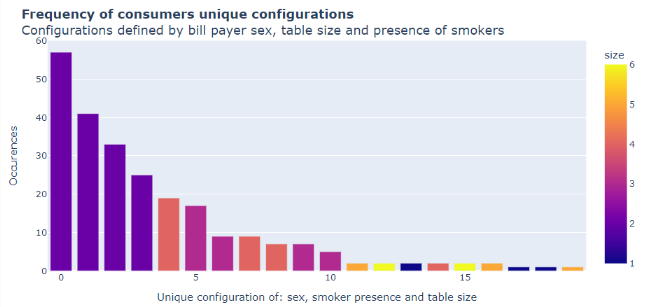

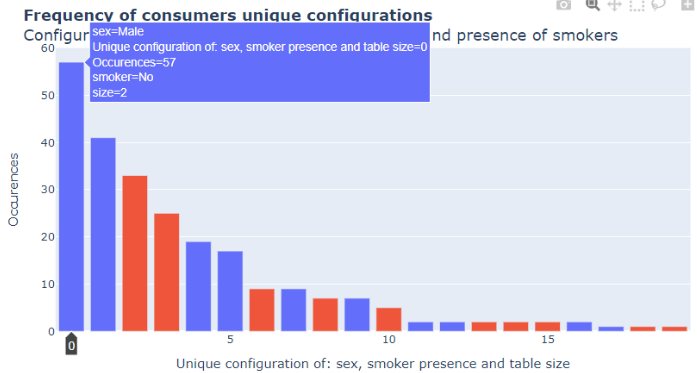

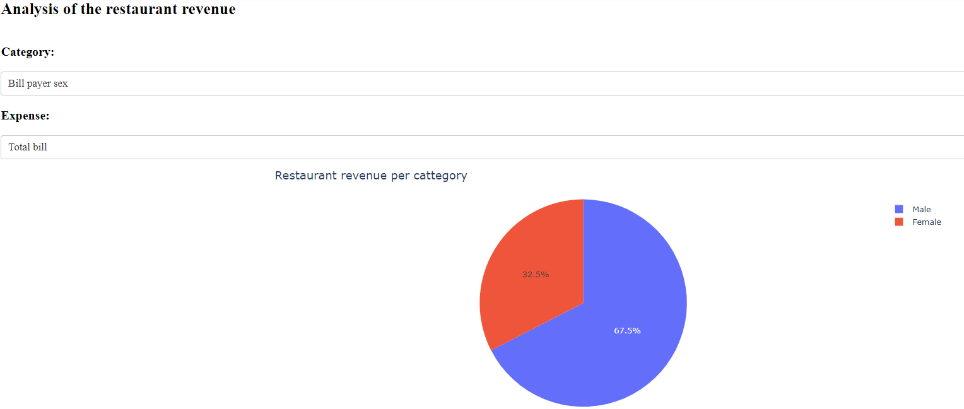

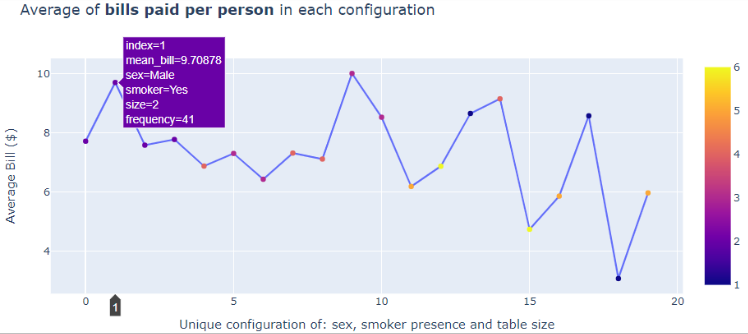

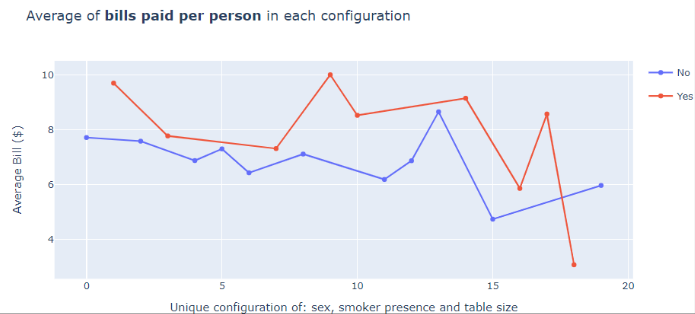

### Em que circunstâncias o restaurante arrecada mais? em quais arrecada menos?
O gráfico de pizza desenvolvido, na seção ***Analysis of the restaurant revenue***, foi a principal visualização utilizada para responder à esta pergunta. O objetivo do gráfico é permitir a análise do total acumulado com as contas e do total de gorjetas com agrupamentos por atributos como `sex`, `size`, `day`, `smoker`.

As seguintes curiosidades e conclusões foram levantadas:
- Com a seleção da categorização por **day (dia da semana)** e da expense **total bill**, dois pontos chamam atenção:
  - A sexta-feira figura como a menor parte do todo, ficando atrás inclusive da quinta-feira, o que indica que a sexta seria o dia de menor movimento ou de menor atuação do funcionário (além disso, não consta nos dados nenhum registro de contas pagas na sexta-feira no horário do almoço).
  - O fim de semana, como esperado, representa a maior parte da renda acumulada com pagamento de contas atendidas pelo garçom, correspondendo a cerca de 70% do total acumulado.
- Com a seleção da categorização por **refeição (ou meal time)** e da expense **total bill**, é notável a predominância das contas pagas em jantar com relação ao total acumulado no almoço, o que indica que o restaurante tem mais público à noite (o que faz sentido quando relembramos que a maior movimentação acontece nos fins de semana).
- Com a seleção da expense **tip** e de qualquer categoria, incluindo as categorias analisadas acima **day** e **meal time**, o gráfico de pizza praticamente mantém as proporções entre suas fatias, o que reforça as tendências percebidas até então sobre as circunstâncias de maior arrecadação do restaurante.

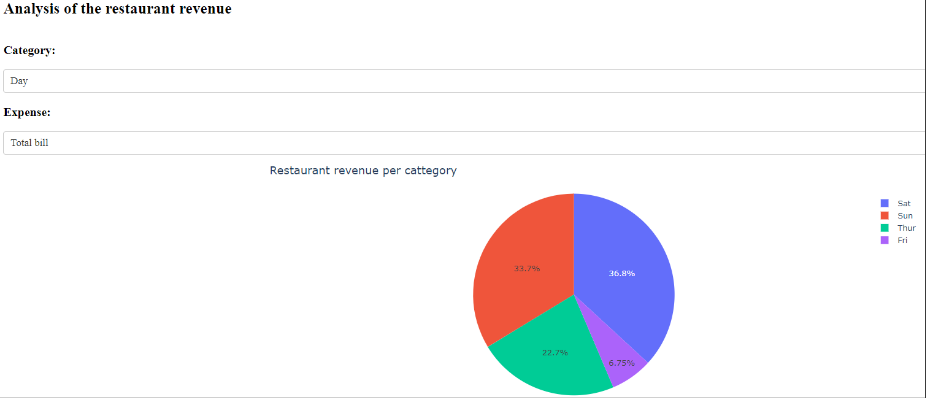

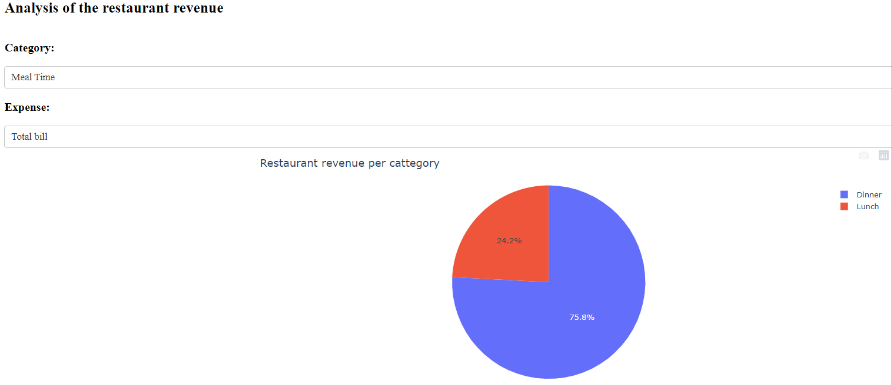

### Qual é a relação entre o valor da conta e das gorjetas?
A análise sobre dessa questão foi feita com as visualizações da seção ***Analysis of the relationship between bill and tip***.
O primeiro gráfico ***Normalized Average Tip and Bill per person correlation*** corresponde a um scatter plot que relaciona as duas seguintes variáveis normalizadas:
- O valor médio de conta pago por pessoa em cada registro do dataset (considerando os atributos **total bill** e **table size**)
- O valor médio de gorjeta pago por pessoa em cada registro do dataset (considerando os atributos **total bill** e **table size**)

Cada ponto no gráfico pode ser categorizado pelo canal visual da cor de acordo com o sexo do pagador da conta total, a presença ou não de fumantes e o tamanho da mesa - o tipo da categorização é selecionado no dropdown acima do plot. Além disso, linhas de tendência também são exibidas com métricas relevantes sobre a correlação entre as variáveis.

A segunda visualização **Normalized average of tips and bills paid per person in each configuration** também faz uso de duas variáveis normalizadas:
- O valor médio de conta pago por pessoa (considerando os atributos **total bill** e **table size**) em cada configuração de atendimento distinta do dataset (definida considerando os atributos **bill payer sex**, **table size** e **smoker presence**)
- O valor médio de gorjeta pago por pessoa (considerando os atributos **total bill** e **table size**) em cada configuração de atendimento distinta do dataset (definida considerando os atributos **bill payer sex**, **table size** e **smoker presence**)

A visualização em questão facilita a comparação das variáveis mencionadas num mesmo plano com relação a cada uma das 20 configurações presentes no dataset.

As seguintes curiosidades foram levantadas:
- Ao visualizar o gráfico com a categorização dos pontos por **table size (tamanho da mesa)**, a trendline de todos os registros do dataset é gerada. Visualmente, a reta de coeficiente positivo (no entanto baixo) representa uma correlação positiva entre os valores de gorjeta e conta médios por pessoa, o que indica uma tendência de que elas crescem e decrescem juntas, mas em velocidades diferentes.
- Ao analisar o gráfico **Normalized average of tips and bills paid per person in each configuration**, as duas linhas representando o valor médio de conta e de gorjeta pagas por pessoa parecem seguir uma mesma tendência de crescimento e decrescimento de uma configuração para outra, o que reforça a ideia de que o valor de conta e o valor de gorjeta estão correlacionados.

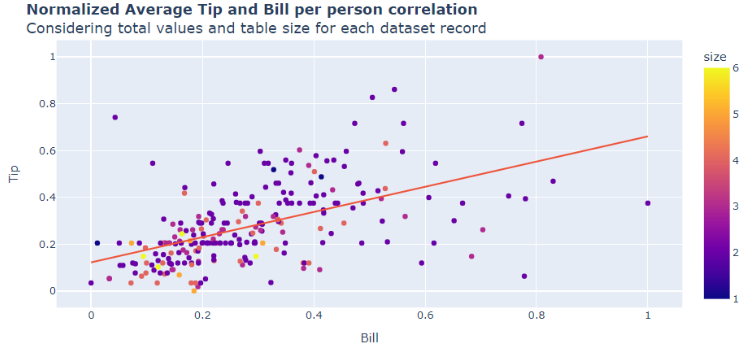

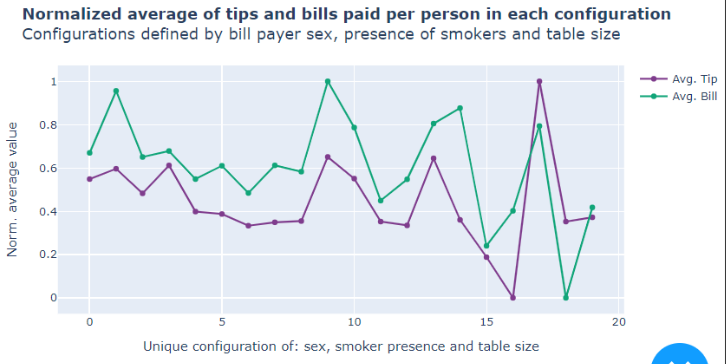